# Gradient descent with theory and code

## Gradient Descent for Linear Regression

### 1. Linear Regression Model
In linear regression, the model can be represented as:

$$
\hat{y}_i = w x_i + b
$$

where:
- $\hat{y}_i$ is the predicted value for the $i-th$ example.
- $w$ is the weight (slope).
- $b$ is the bias (intercept).
- $x_i$ is the input feature for the $i-th$ example.




### 2. Cost Function
The cost function (Mean Squared Error) measures the difference between the predicted values and the actual values. It is given by:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

where:
- $m$ is the number of training examples.
- $y_i$ is the actual value for the $i-th$ example.
- $\hat{y}_i$ is the predicted value for the $i-th$ example.

### 3. Gradient Descent Algorithm
Gradient descent aims to minimize the cost function by iteratively updating the parameters $(w)$ and $(b)$. The update rules are:

$$
w := w - \alpha \frac{\partial J(w, b)}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J(w, b)}{\partial b}
$$

where:
- $\alpha$ is the learning rate.
- $\alpha \frac{\partial J(w, b)}{\partial w}$ and $\frac{\partial J(w, b)}{\partial b}$ are the partial derivatives of the cost function with respect to $(w)$ and $(b)$, respectively. (calculated in the next step)


### 4. Partial Derivatives
The partial derivatives of the cost function are:

$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$


### 5. Iterative Update
Using these partial derivatives, the parameters are updated iteratively until convergence:

$$
w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i
$$

$$
b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$

By following these steps, gradient descent helps in finding the optimal values of $(w)$ and $(b)$ that minimize the cost function, thus providing the best-fit line for the data.

## Let's Code it out

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
# yhat = wx + b
# loss = (y-yhat)**2 / m

In [27]:
# Make some random data as input data
x = np.random.randn(50,1)
x[:5]

array([[ 1.17124945],
       [ 0.00571221],
       [ 2.13132516],
       [-1.38189677],
       [-1.90990318]])

Actual Bias is: 2
Actual weight is: 5


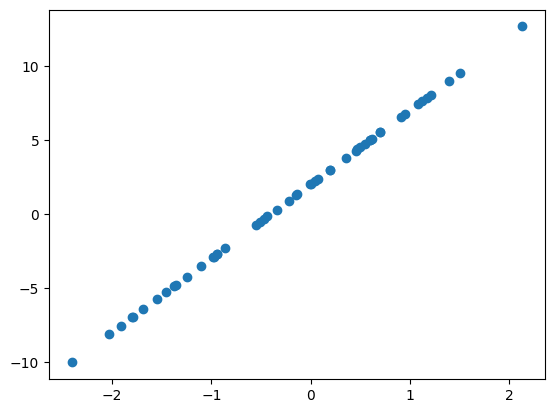

In [28]:
# Initialise some parameters

# Pick some values for the weight and bias which later on we'll see if the gradient descent can figure them out or nor
w_actual = 5
b_actual = 2    

print(f"Actual Bias is: {b_actual}")
print(f"Actual weight is: {w_actual}")

# Make a line using the weight, bias and x 
y = w_actual*x + b_actual

# plot it
plt.scatter(x,y)

Here the fun begins! For a real case senario, we don't know the actual value of the wight and bias. We use Gradient descent to find them. 

In [29]:
# Parameters to find:
weight = 0.0
bias = 0.0

# Hyperparameters
learning_rate = 0.01

The `descend` function updates the weight (`w`) and bias (`b`) in a linear regression model using gradient descent. It calculates the gradients of the loss function with respect to `w` and `b` from the input features (`x`) and target values (`y`), then adjusts `w` and `b` by subtracting the product of the learning rate and the average gradient, aiming to minimize the mean squared error loss.

In [30]:
# Create gradient descent function
def descend(x, y, w, b, learning_rate):
    dldw = 0.0  # Initialize gradient for weight
    dldb = 0.0  # Initialize gradient for bias
    m = x.shape[0]  # Number of data points
    # loss = (y-(wx+b))**2  # Loss function (commented out)
    for xi, yi in zip(x, y):
        dldw += -2*xi*(yi-(w*xi+b))  # Accumulate gradient for weight
        dldb += -2*(yi-(w*xi+b))  # Accumulate gradient for bias
        
    # Make an Update to the w parameter
    w = w - learning_rate * (1/m) * dldw  # Update weight
    b = b - learning_rate * (1/m) * dldb  # Update bias
    
    return w, b  # Return updated parameters


In [31]:
print(f"Actual weight is: {w_actual} | Actual Bias is: {b_actual}")
print('----------')
# Iteratively make Updates
for epoch in range(400):  # Loop over 400 epochs
    # Run gradient descent
    weight, bias = descend(x, y, weight, bias, learning_rate)  # Update weight and bias
    yhat = weight*x + bias  # Calculate predictions
    m = x.shape[0]  # Number of Samples
    loss = np.divide(np.sum((y-yhat)**2, axis=0), m)  # Compute mean squared error loss
    if epoch % 50 == 0:  # Every 50 epochs
        print(f"For epoch {epoch} -> loss is: {loss}, parameters-> weight:{weight}, bias: {bias}")  # Print loss and parameters

Actual weight is: 5 | Actual Bias is: 2
----------
For epoch 0 -> loss is: [28.1496439], parameters-> weight:[0.10929591], bias: [0.02048662]
For epoch 50 -> loss is: [3.66412652], parameters-> weight:[3.34079578], bias: [0.93785508]
For epoch 100 -> loss is: [0.54545229], parameters-> weight:[4.4109112], bias: [1.49479935]
For epoch 150 -> loss is: [0.0877128], parameters-> weight:[4.78225813], bias: [1.77312409]
For epoch 200 -> loss is: [0.01464666], parameters-> weight:[4.9168253], bias: [1.90125326]
For epoch 250 -> loss is: [0.00248747], parameters-> weight:[4.96741801], bias: [1.95779858]
For epoch 300 -> loss is: [0.00042554], parameters-> weight:[4.98700066], bias: [1.98216317]
For epoch 350 -> loss is: [7.30251782e-05], parameters-> weight:[4.99474658], bias: [1.99251284]
